In [1]:
#@title **Cargar librerias**
import os
import shutil
import random
from PIL import Image
from itertools import chain

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook, tnrange
from IPython.display import HTML

In [2]:
#@title Definir las rutas del dataset 

# Directorios de entrada y salida
Datos_Originales = 'Datos\Data'
Datos_Filtrados = 'Datos\Datos_Filtrados'
Datos_Generados = 'Datos\Datos_Generados'

# Obtén la lista de archivos y carpetas en la ruta especificada
contenido = os.listdir(Datos_Originales)

# Filtra solo las carpetas
nombres = [elemento for elemento in contenido if os.path.isdir(os.path.join(Datos_Originales, elemento))]

# Imprime la lista de carpetas
print("Carpetas en la carpeta {}: {}".format(Datos_Originales, nombres))


Carpetas en la carpeta Datos\Data: ['Familia_Amanita', 'Familia_Boletus', 'Familia_Cladonia', 'Familia_Coprinellus', 'Familia_Daedaleopsis', 'Familia_Ervenia', 'Familia_Formitopsis', 'Familia_Gyromitra', 'Familia_Hypholoma', 'Familia_Lactarius', 'Familia_Leccinum', 'Familia_Peltigera', 'Familia_Phellinus', 'Familia_Pholiota', 'Familia_Suillus', 'Familia_Trametes']


In [3]:
#@title Filtrar imágenes Tercer Prototipo AUTOMATICO con limite de imagenes y cambio de tamaño


#Tamaño al que se redimensionan las imágenes
nuevo_tamano = (500, 500)

#Cantidad máxima de imágenes
max_imagenes = 800

for nombre in nombres:

    input_folder = os.path.join(Datos_Originales, nombre)
    output_folder = os.path.join(Datos_Filtrados, nombre)

    #Verifica que la carpeta exista o la crea
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    else:
        #Vacía la carpeta
        shutil.rmtree(output_folder)
        os.makedirs(output_folder)
    
    imagenes_copiadas = 0
    
    for filename in os.listdir(input_folder):
        filepath = os.path.join(input_folder, filename)
    
        if os.path.isfile(filepath) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):

            with Image.open(filepath) as img:

                ancho, alto = img.size
    
                if ancho > 350 and alto > 350:

                    #Convierte la imagen a modo RGB si es RGBA
                    if img.mode == 'RGBA':
                        img = img.convert('RGB')
                    
                    #Redimensiona la imagen a 500x500
                    img = img.resize(nuevo_tamano)
                    
                    #Cambia el formato a jpg
                    output_filepath = os.path.join(output_folder, os.path.splitext(filename)[0] + ".jpg")
                    img.save(output_filepath, "JPEG")
                    
                    imagenes_copiadas += 1
                    
                    if imagenes_copiadas >= max_imagenes:
                        break

print(f"Proceso completado. Se han copiado como máximo {max_imagenes} imágenes por carpeta, se han redimensionado a 500x500 y se han convertido a formato jpg.")


Proceso completado. Se han copiado como máximo 800 imágenes por carpeta, se han redimensionado a 500x500 y se han convertido a formato jpg.


In [5]:
#@title Generar nuevas imágenes

# Número de imágenes esperadas
target_images = 800

for nombre in nombres:

    input_folder = os.path.join(Datos_Filtrados, nombre)
    output_folder = os.path.join(Datos_Generados, nombre)

    # Asegúrate de que la carpeta de salida exista
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    else:
        # Elimina todos los archivos en la carpeta de salida
        shutil.rmtree(output_folder)
        os.makedirs(output_folder)

    # Lista de archivos en la carpeta de entrada
    image_files = os.listdir(input_folder)

    # Número actual de imágenes
    current_images = len(image_files)

    while current_images < target_images:
        
        # Selecciona una imagen aleatoria de la carpeta de entrada
        random_image = np.random.choice(image_files)
        image_path = os.path.join(input_folder, random_image)


        img = cv2.imread(image_path)

        # Aplica rotación con probabilidad
        if np.random.rand() < 0.5:
            angle = np.random.randint(-100, 100)
            rows, cols, _ = img.shape
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
            img = cv2.warpAffine(img, M, (cols, rows))

        # Aplica cambio de escala
        if np.random.rand() < 0.5:
            scale_factor = np.random.uniform(1, 1.5)
            img = cv2.resize(img, None, fx=scale_factor, fy=scale_factor)

        # Aplica cambio de brillo
        if np.random.rand() < 0.5:
            brightness = np.random.randint(-30, 30)
            img = cv2.add(img, brightness)

        # Aplica espejeo horizontal o vertical
        if np.random.rand() < 0.5:
            flip_direction = np.random.choice([-1, 0, 1])
            img = cv2.flip(img, flip_direction)

        # Aplica desplazamiento aleatorio en las direcciones x e y
        if np.random.rand() < 0.5:
            shift_x, shift_y = np.random.randint(-20, 20, size=2)
            M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
            img = cv2.warpAffine(img, M, (cols, rows))

        # Guarda la nueva imagen en la carpeta de salida
        output_path = os.path.join(output_folder, f'generated_image_{current_images}.jpg')
        cv2.imwrite(output_path, img)

        # Actualiza el número actual de imágenes
        current_images += 1

    print(f'Se generaron {current_images - len(image_files)} nuevas imágenes en {output_folder}.')

    # Copia todas las imágenes de la carpeta de entrada a la carpeta de salida
    for image_file in image_files:
        input_image_path = os.path.join(input_folder, image_file)
        output_image_path = os.path.join(output_folder, image_file)
        shutil.copy2(input_image_path, output_image_path)

    print(f'Se copiaron todas las imágenes de {input_folder} a {output_folder}.')



Se generaron 84 nuevas imágenes en Datos\Datos_Generados\Familia_Amanita.
Se copiaron todas las imágenes de Datos\Datos_Filtrados\Familia_Amanita a Datos\Datos_Generados\Familia_Amanita.
Se generaron 96 nuevas imágenes en Datos\Datos_Generados\Familia_Boletus.
Se copiaron todas las imágenes de Datos\Datos_Filtrados\Familia_Boletus a Datos\Datos_Generados\Familia_Boletus.
Se generaron 195 nuevas imágenes en Datos\Datos_Generados\Familia_Cladonia.
Se copiaron todas las imágenes de Datos\Datos_Filtrados\Familia_Cladonia a Datos\Datos_Generados\Familia_Cladonia.
Se generaron 190 nuevas imágenes en Datos\Datos_Generados\Familia_Coprinellus.
Se copiaron todas las imágenes de Datos\Datos_Filtrados\Familia_Coprinellus a Datos\Datos_Generados\Familia_Coprinellus.
Se generaron 286 nuevas imágenes en Datos\Datos_Generados\Familia_Daedaleopsis.
Se copiaron todas las imágenes de Datos\Datos_Filtrados\Familia_Daedaleopsis a Datos\Datos_Generados\Familia_Daedaleopsis.
Se generaron 111 nuevas imágenes

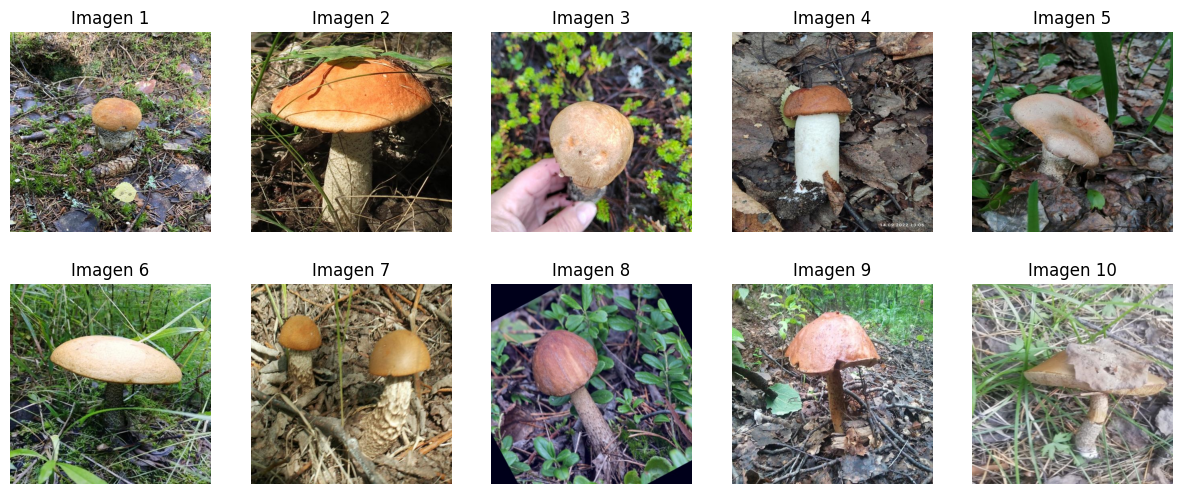

In [7]:
#@title Mostrar imágenes

#Carpeta origen
carpeta_imagenes = os.path.join(Datos_Generados, nombres[10])

# Lista de todas las imágenes en la carpeta
imagenes = [f for f in os.listdir(carpeta_imagenes) if os.path.isfile(os.path.join(carpeta_imagenes, f))]

# Selecciona 10 imágenes al azar
imagenes_seleccionadas = random.sample(imagenes, 10)

# Configura el tamaño del subplot
plt.figure(figsize=(15, 6))

# Itera sobre las imágenes seleccionadas y las muestra en un subplot
for i, imagen in enumerate(imagenes_seleccionadas, 1):
    ruta_imagen = os.path.join(carpeta_imagenes, imagen)
    plt.subplot(2, 5, i)  # Subplot de 2 filas y 5 columnas
    img = mpimg.imread(ruta_imagen)
    plt.imshow(img)
    plt.axis('off')  # Desactiva los ejes
    plt.title(f'Imagen {i}')

# Muestra el conjunto de imágenes seleccionadas
plt.show()